# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\pavani\Downloads\Health monitoring.csv")

In [3]:
dataset

,SBP,DBP,Pulse,smoker,Temperature,Level
0,120,80,80,no,98,0
1,140,83,75,no,100,1
2,155,100,92,yes,104,2
3,115,82,79,no,97,0
4,119,79,85,no,102,1
...,...,...,...,...,...,...
144,154,99,83,yes,103,2
145,118,77,73,no,98,0
146,125,87,79,yes,102,1
147,132,88,78,no,101,1


In [4]:
dataset['Level'].value_counts()

0    54
2    53
1    42
Name: Level, dtype: int64

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
dataset.head(10)

,SBP,DBP,Pulse,smoker,Temperature,Level
0,120,80,80,no,98,0
1,140,83,75,no,100,1
2,155,100,92,yes,104,2
3,115,82,79,no,97,0
4,119,79,85,no,102,1
5,95,65,75,yes,101,2
6,116,75,70,no,99,0
7,100,60,79,no,98,2
8,119,78,68,no,100,0
9,110,69,65,yes,102,2


In [7]:
dataset.shape

(149, 6)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SBP          149 non-null    int64 
 1   DBP          149 non-null    int64 
 2   Pulse        149 non-null    int64 
 3   smoker       149 non-null    object
 4   Temperature  149 non-null    int64 
 5   Level        149 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.1+ KB


In [9]:
dataset.describe()


,SBP,DBP,Pulse,Temperature,Level
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,123.516779,81.261745,75.550336,99.926174,0.993289
std,14.486995,9.752613,5.344151,2.056939,0.850252
min,95.000000,60.000000,60.000000,94.000000,0.000000
25%,117.000000,77.000000,72.000000,98.000000,0.000000
50%,119.000000,80.000000,76.000000,100.000000,1.000000
75%,132.000000,88.000000,79.000000,101.000000,2.000000
max,155.000000,101.000000,92.000000,106.000000,2.000000


# Data Visualization

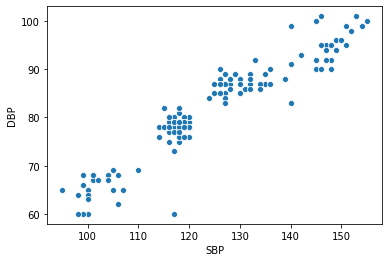

In [10]:
#data visualization
sns.scatterplot(x="SBP",y="DBP",data=dataset)

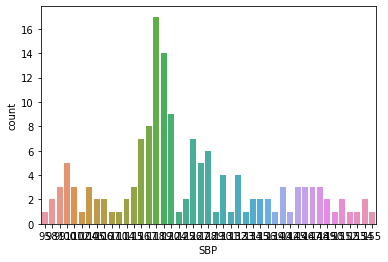

In [11]:
sns.countplot(x="SBP",data=dataset)

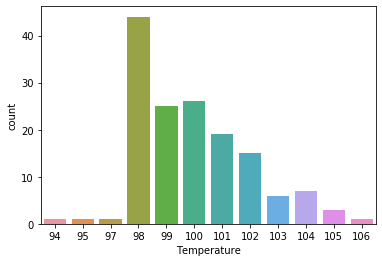

In [12]:
sns.countplot(x="Temperature",data=dataset)

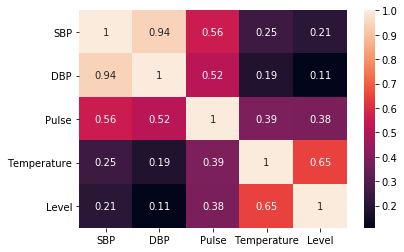

In [13]:
sns.heatmap(dataset.corr(),annot=True)

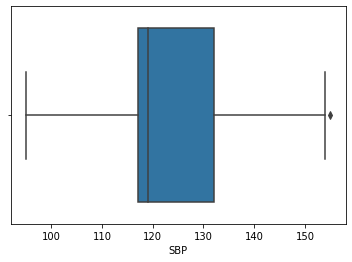

In [14]:
sns.boxplot(dataset['SBP'])

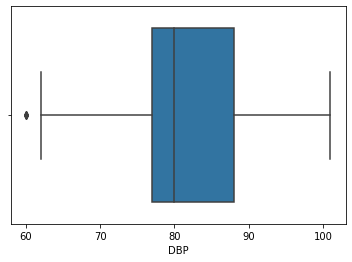

In [15]:
sns.boxplot(dataset['DBP'])

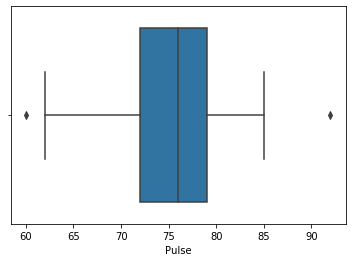

In [16]:
sns.boxplot(dataset['Pulse'])

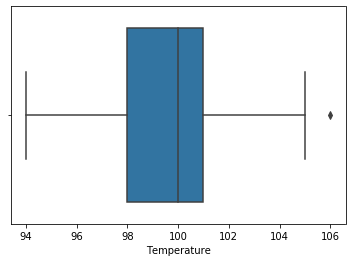

In [17]:
sns.boxplot(dataset['Temperature'])

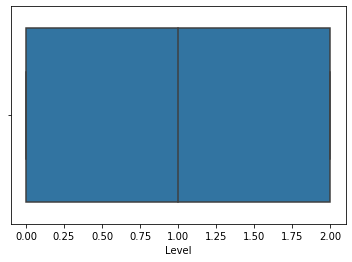

In [18]:
sns.boxplot(dataset['Level'])

# Removing Outliers

In [19]:
iqr = dataset.quantile(0.75)-dataset.quantile(0.25)
iqr

SBP            15.0
DBP            11.0
Pulse           7.0
Temperature     3.0
Level           2.0
dtype: float64

In [20]:
lw=dataset.quantile(0.25)-(iqr*1.5)
lw

SBP            94.5
DBP            60.5
Pulse          61.5
Temperature    93.5
Level          -3.0
dtype: float64

In [21]:
uw = dataset.quantile(0.75)+(iqr*1.5)
uw

SBP            154.5
DBP            104.5
Pulse           89.5
Temperature    105.5
Level            5.0
dtype: float64

In [22]:
dataset['S_new']=np.where(dataset['SBP']<=lw[0],dataset['SBP'].quantile(0.25),dataset['SBP'])
dataset['S_new']=np.where(dataset['SBP']>=uw[0],dataset['SBP'].quantile(0.75),dataset['S_new'])
dataset

,SBP,DBP,Pulse,smoker,Temperature,Level,S_new
0,120,80,80,no,98,0,120.0
1,140,83,75,no,100,1,140.0
2,155,100,92,yes,104,2,132.0
3,115,82,79,no,97,0,115.0
4,119,79,85,no,102,1,119.0
...,...,...,...,...,...,...,...
144,154,99,83,yes,103,2,154.0
145,118,77,73,no,98,0,118.0
146,125,87,79,yes,102,1,125.0
147,132,88,78,no,101,1,132.0


In [23]:
dataset['D_new']=np.where(dataset['DBP']<=lw[1],dataset['DBP'].quantile(0.25),dataset['DBP'])
dataset['D_new']=np.where(dataset['DBP']>=uw[1],dataset['DBP'].quantile(0.75),dataset['D_new'])
dataset

,SBP,DBP,Pulse,smoker,Temperature,Level,S_new,D_new
0,120,80,80,no,98,0,120.0,80.0
1,140,83,75,no,100,1,140.0,83.0
2,155,100,92,yes,104,2,132.0,100.0
3,115,82,79,no,97,0,115.0,82.0
4,119,79,85,no,102,1,119.0,79.0
...,...,...,...,...,...,...,...,...
144,154,99,83,yes,103,2,154.0,99.0
145,118,77,73,no,98,0,118.0,77.0
146,125,87,79,yes,102,1,125.0,87.0
147,132,88,78,no,101,1,132.0,88.0


In [24]:
dataset['P_new']=np.where(dataset['Pulse']<=lw[2],dataset['Pulse'].quantile(0.25),dataset['Pulse'])
dataset['P_new']=np.where(dataset['Pulse']>=uw[2],dataset['Pulse'].quantile(0.75),dataset['P_new'])
dataset

,SBP,DBP,Pulse,smoker,Temperature,Level,S_new,D_new,P_new
0,120,80,80,no,98,0,120.0,80.0,80.0
1,140,83,75,no,100,1,140.0,83.0,75.0
2,155,100,92,yes,104,2,132.0,100.0,79.0
3,115,82,79,no,97,0,115.0,82.0,79.0
4,119,79,85,no,102,1,119.0,79.0,85.0
...,...,...,...,...,...,...,...,...,...
144,154,99,83,yes,103,2,154.0,99.0,83.0
145,118,77,73,no,98,0,118.0,77.0,73.0
146,125,87,79,yes,102,1,125.0,87.0,79.0
147,132,88,78,no,101,1,132.0,88.0,78.0


In [25]:
dataset['T_new']=np.where(dataset['Temperature']<=lw[3],dataset['Temperature'].quantile(0.25),dataset['Temperature'])
dataset['T_new']=np.where(dataset['Temperature']>=uw[3],dataset['Temperature'].quantile(0.75),dataset['T_new'])
dataset

,SBP,DBP,Pulse,smoker,Temperature,Level,S_new,D_new,P_new,T_new
0,120,80,80,no,98,0,120.0,80.0,80.0,98.0
1,140,83,75,no,100,1,140.0,83.0,75.0,100.0
2,155,100,92,yes,104,2,132.0,100.0,79.0,104.0
3,115,82,79,no,97,0,115.0,82.0,79.0,97.0
4,119,79,85,no,102,1,119.0,79.0,85.0,102.0
...,...,...,...,...,...,...,...,...,...,...
144,154,99,83,yes,103,2,154.0,99.0,83.0,103.0
145,118,77,73,no,98,0,118.0,77.0,73.0,98.0
146,125,87,79,yes,102,1,125.0,87.0,79.0,102.0
147,132,88,78,no,101,1,132.0,88.0,78.0,101.0


In [26]:
dataset.describe()

,SBP,DBP,Pulse,Temperature,Level,S_new,D_new,P_new,T_new
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,123.516779,81.261745,75.550336,99.926174,0.993289,123.362416,81.718121,75.543624,99.892617
std,14.486995,9.752613,5.344151,2.056939,0.850252,14.270180,9.120130,5.026260,1.997096
min,95.000000,60.000000,60.000000,94.000000,0.000000,95.000000,62.000000,62.000000,94.000000
25%,117.000000,77.000000,72.000000,98.000000,0.000000,117.000000,77.000000,72.000000,98.000000
50%,119.000000,80.000000,76.000000,100.000000,1.000000,119.000000,80.000000,76.000000,100.000000
75%,132.000000,88.000000,79.000000,101.000000,2.000000,132.000000,88.000000,79.000000,101.000000
max,155.000000,101.000000,92.000000,106.000000,2.000000,154.000000,101.000000,85.000000,105.000000


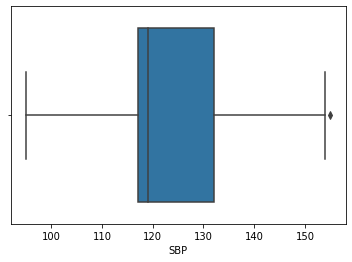

In [27]:
sns.boxplot(dataset['SBP'])

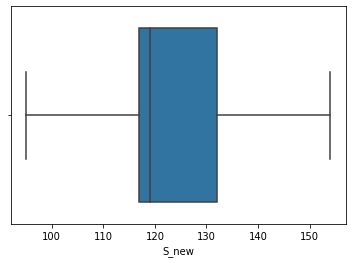

In [28]:
sns.boxplot(dataset['S_new'])

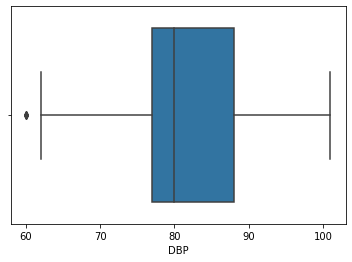

In [29]:
sns.boxplot(dataset['DBP'])

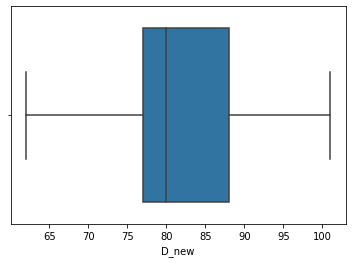

In [30]:
sns.boxplot(dataset['D_new'])

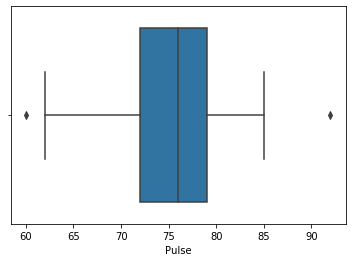

In [31]:
sns.boxplot(dataset['Pulse'])

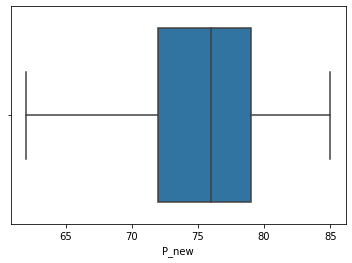

In [32]:
sns.boxplot(dataset['P_new'])

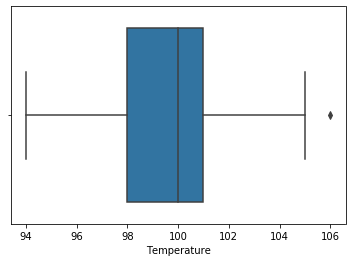

In [33]:
sns.boxplot(dataset['Temperature'])

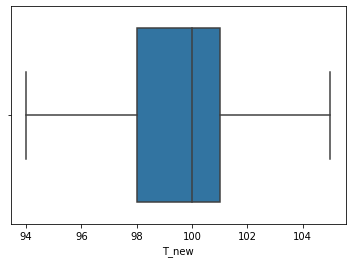

In [34]:
sns.boxplot(dataset['T_new'])

# Taking Care Of Missing Values

In [35]:
dataset.isnull().sum()

SBP            0
DBP            0
Pulse          0
smoker         0
Temperature    0
Level          0
S_new          0
D_new          0
P_new          0
T_new          0
dtype: int64

In [36]:
dataset.drop(['smoker'],axis=1,inplace=True)

In [37]:
dataset.isnull().any()

SBP            False
DBP            False
Pulse          False
Temperature    False
Level          False
S_new          False
D_new          False
P_new          False
T_new          False
dtype: bool

In [38]:
dataset.head()

,SBP,DBP,Pulse,Temperature,Level,S_new,D_new,P_new,T_new
0,120,80,80,98,0,120.0,80.0,80.0,98.0
1,140,83,75,100,1,140.0,83.0,75.0,100.0
2,155,100,92,104,2,132.0,100.0,79.0,104.0
3,115,82,79,97,0,115.0,82.0,79.0,97.0
4,119,79,85,102,1,119.0,79.0,85.0,102.0


In [39]:
x=dataset.iloc[:,5:9].values
y=dataset.iloc[:,4].values


In [40]:
x.shape

(149, 4)

In [41]:
y.shape

(149,)

# Splitting The Data Into Train and Test

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(119, 4)
(119,)
(30, 4)
(30,)


(array([54.,  0.,  0.,  0.,  0., 42.,  0.,  0.,  0., 53.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

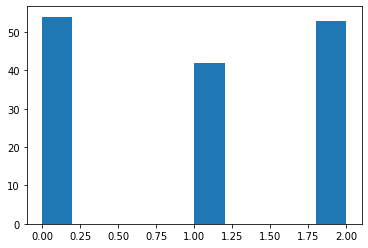

In [43]:
plt.hist(y)

In [44]:
x_train

array([[128.,  87.,  80., 100.],
       [ 99.,  66.,  79., 102.],
       [107.,  65.,  80., 102.],
       [ 98.,  77.,  64., 101.],
       [140.,  91.,  80., 102.],
       [136.,  90.,  79., 101.],
       [130.,  87.,  76., 100.],
       [118.,  81.,  72.,  98.],
       [140.,  99.,  85., 102.],
       [132., 100.,  79., 104.],
       [125.,  87.,  79., 102.],
       [117.,  73.,  76.,  99.],
       [104.,  68.,  79., 101.],
       [154.,  99.,  79., 100.],
       [147.,  94.,  79., 100.],
       [120.,  78.,  69.,  98.],
       [128.,  86.,  64., 101.],
       [104.,  68.,  79., 101.],
       [126.,  85.,  76., 100.],
       [120.,  78.,  71.,  99.],
       [119.,  79.,  70.,  98.],
       [120.,  80.,  76.,  98.],
       [118.,  77.,  73.,  98.],
       [132.,  87.,  77.,  98.],
       [118.,  79.,  76., 100.],
       [147.,  92.,  80.,  99.],
       [127.,  84.,  75., 100.],
       [100.,  65.,  62.,  95.],
       [119.,  80.,  75.,  98.],
       [118.,  76.,  74.,  98.],
       [11

# Traning and Testing the Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=100,random_state=0)
randomforest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
rpred=randomforest.predict(x_test)

# Evaluation

In [48]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,rpred)

In [49]:
raccuracy=r2_score(y_test,rpred)

In [50]:
raccuracy

0.7727272727272727

In [51]:
dataset.head(10)

,SBP,DBP,Pulse,Temperature,Level,S_new,D_new,P_new,T_new
0,120,80,80,98,0,120.0,80.0,80.0,98.0
1,140,83,75,100,1,140.0,83.0,75.0,100.0
2,155,100,92,104,2,132.0,100.0,79.0,104.0
3,115,82,79,97,0,115.0,82.0,79.0,97.0
4,119,79,85,102,1,119.0,79.0,85.0,102.0
5,95,65,75,101,2,95.0,65.0,75.0,101.0
6,116,75,70,99,0,116.0,75.0,70.0,99.0
7,100,60,79,98,2,100.0,77.0,79.0,98.0
8,119,78,68,100,0,119.0,78.0,68.0,100.0
9,110,69,65,102,2,110.0,69.0,65.0,102.0


In [52]:
rp=randomforest.predict([[132,100,79,104]])

In [53]:
rp

array([2], dtype=int64)

In [54]:
import pickle
pickle.dump(randomforest,open('level.pkl','wb'))